In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

In [3]:
PROJECT_ROOT = Path().resolve()

while not (PROJECT_ROOT / "data").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

# Build correct file path
file_path = PROJECT_ROOT / "data" / "processed" / "nifty50_processed.csv"

In [5]:
df = pd.read_csv(file_path, low_memory=False)
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Stock
0,0,2010-01-04,55.718451,57.859506,55.183188,57.553642,1860224,ADANIENT.NS
1,1,2010-01-05,57.732052,59.127560,57.732052,58.885418,2280286,ADANIENT.NS
2,2,2010-01-06,59.006477,65.888437,58.624147,64.696838,7326390,ADANIENT.NS
3,3,2010-01-07,66.194331,66.194331,61.555372,62.026913,4759208,ADANIENT.NS
4,4,2010-01-08,62.421990,64.741473,61.453420,62.810696,3324076,ADANIENT.NS
...,...,...,...,...,...,...,...,...
177231,177231,2024-12-24,288.250678,289.844270,283.844884,286.188385,8837902,WIPRO.NS
177232,177232,2024-12-26,286.282136,287.735125,284.969781,285.954041,6516148,WIPRO.NS
177233,177233,2024-12-27,286.094662,291.437828,285.625962,289.750519,8063921,WIPRO.NS
177234,177234,2024-12-30,289.750526,290.031734,283.704280,284.688568,13709891,WIPRO.NS


In [6]:
stock = "RELIANCE.NS"

stock_df = df[df["Stock"] == stock].copy()
stock_df = stock_df.sort_values("Date")

stock_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Stock
134747,134747,2010-01-04,221.763734,221.763734,207.688828,218.593063,76646086,RELIANCE.NS
134748,134748,2010-01-05,233.714740,233.714740,216.540283,217.617493,21392825,RELIANCE.NS
134749,134749,2010-01-06,219.487367,222.454796,217.607324,221.133682,23691760,RELIANCE.NS
134750,134750,2010-01-07,221.133693,226.621378,219.101204,224.802307,26197920,RELIANCE.NS
134751,134751,2010-01-08,225.198627,226.377471,222.759654,224.212875,15110149,RELIANCE.NS


In [7]:
prophet_df = stock_df[["Date", "Close"]]
prophet_df.columns = ["ds", "y"]

prophet_df.head()

,ds,y
134747,2010-01-04,218.593063
134748,2010-01-05,217.617493
134749,2010-01-06,221.133682
134750,2010-01-07,224.802307
134751,2010-01-08,224.212875


In [8]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=False
)

model.fit(prophet_df)


13:39:16 - cmdstanpy - INFO - Chain [1] start processing
13:39:17 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(
    periods=30,
    freq="B"
)

forecast = model.predict(future)


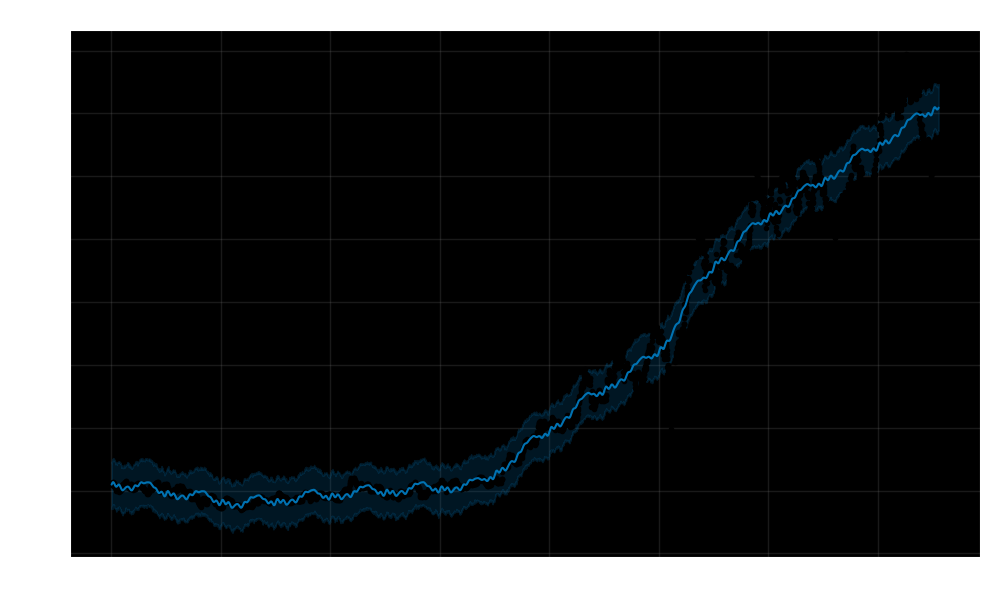

In [10]:
model.plot(forecast)
plt.title(f"{stock} — 30 Day Forecast")
plt.show()


In [11]:
years = 5
days = 365 * years

future_long = model.make_future_dataframe(
    periods=days,
    freq="B"
)

forecast_long = model.predict(future_long)

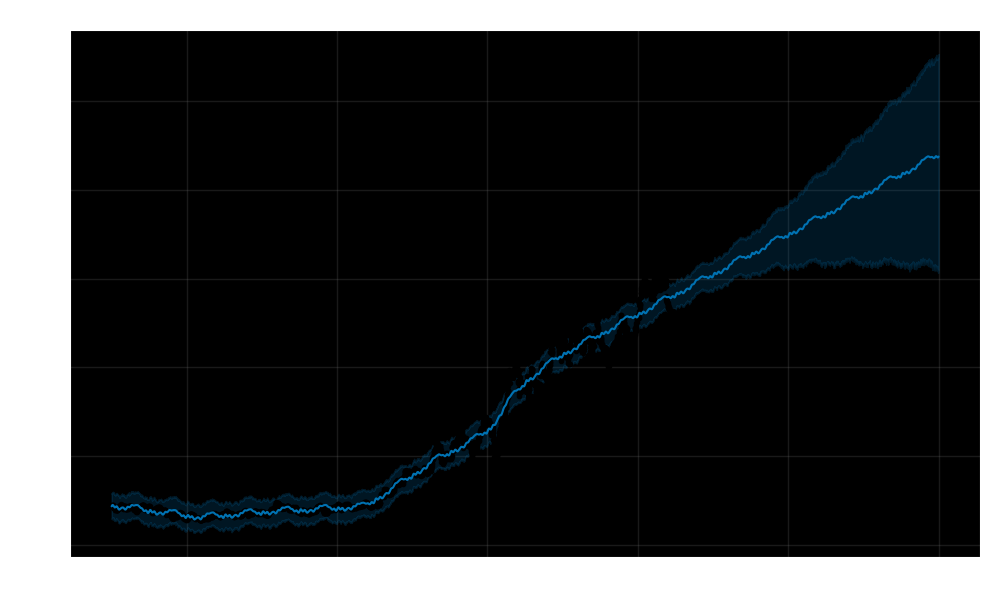

In [12]:
model.plot(forecast_long)
plt.title(f"{stock} — {years} Year Forecast")
plt.show()

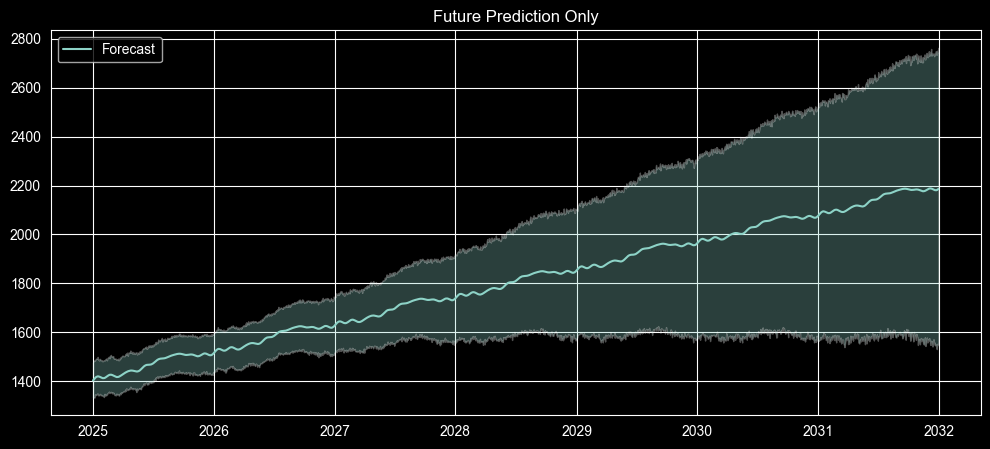

In [13]:
future_only = forecast_long.tail(days)

plt.figure(figsize=(12,5))
plt.plot(future_only["ds"], future_only["yhat"], label="Forecast")
plt.fill_between(
    future_only["ds"],
    future_only["yhat_lower"],
    future_only["yhat_upper"],
    alpha=0.3
)
plt.legend()
plt.title("Future Prediction Only")
plt.show()
